In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# QUESTION NO.1: Use Pandas to import the data from "fcc-forum-pageviews.csv". 
# Set the index to the "date" column.load the dataframe and parse the date column

df = pd.read_csv(r"C:\Users\lucac\Downloads\fcc-forum-pageviews.csv", parse_dates = ['date'])

In [3]:
# set date column as index

df.set_index('date')


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[(df['value'] <= df['value'].quantile(0.975))& (df['value'] >= df['value'].quantile(0.025))]

In [ ]:
df.dtypes

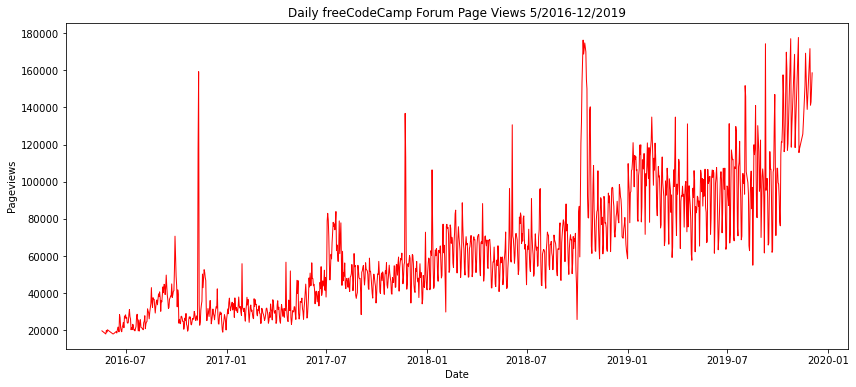

In [5]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

x = df['date']
y = df['value']

fig, ax = plt.subplots(figsize=(14,6))

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Pageviews')

plt.plot(x, y, color = 'red', linewidth=1)
plt.show()

In [6]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of "Months". 
# On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

df_bar = df.copy()

df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month

In [7]:

# groupby year, month and find the mean

df_bar = df_bar.groupby(['year', 'month']).mean()
df_bar = df_bar.unstack()


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

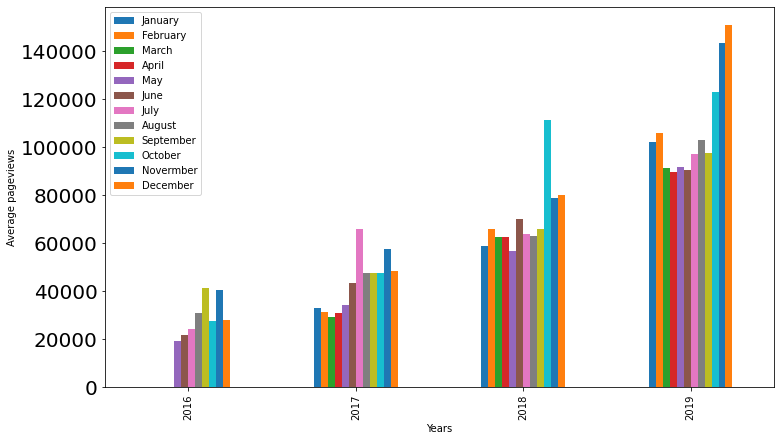

In [8]:
# draw the bar plot

fig = df_bar.plot.bar(legend = True, figsize=(12,7), ylabel='Average pageviews', xlabel='Years').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'Novermber', 'December'])

plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

In [10]:
# Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be
# "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis
# are labeled correctly.

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [11]:
# number the months and sort them numerically

df_box['month-num'] = df_box['date'].dt.month 
df_box = df_box.sort_values('month-num')



Text(0, 0.5, 'pageviews')

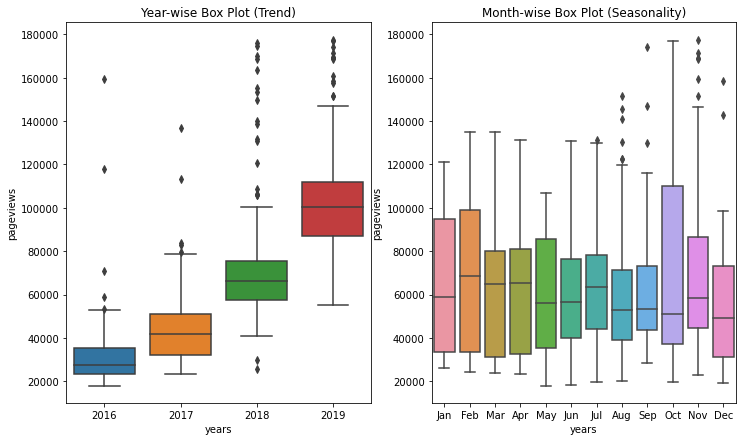

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7)) # due grfici, una riga, due colonne

axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0]) #first chart, axis0

axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1]) # second chart, axis1

axes[0].set_title ("Year-wise Box Plot (Trend)")
axes[0].set_xlabel('years')
axes[0].set_ylabel('pageviews')

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel('years')
axes[1].set_ylabel('pageviews')